In [89]:
import pandas as pd
import numpy as np
import requests
import nflfastpy
from scipy import stats
from matplotlib import pyplot as plt

In [106]:
# all players on roster in 2021
df = nflfastpy.load_roster_data(2021)

In [4]:
pbp_df = nflfastpy.load_pbp_data(year=2021)

In [5]:
passing_df = pbp_df.loc[pbp_df['pass_attempt'] == 1, ['week', 'receiver_player_id', 'posteam', 'receiver_player_name', 'receiver_jersey_number',
                                              'air_yards', 'complete_pass', 'yards_gained', 'pass_touchdown']]

In [6]:
week1_pass_plays = passing_df.loc[passing_df['week'] == 1]

In [7]:
# lets look at panthers passing plays for whole season
panthers = passing_df[passing_df['posteam'] == 'CAR']

In [8]:
# panther fantasy points
panthers['half_receving_points'] = .5*panthers['complete_pass'] + 6*panthers['pass_touchdown'] + .1*panthers['yards_gained']

C:\Users\jacotayl\AppData\Local\Temp/ipykernel_19480/1636805988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panthers['half_receving_points'] = .5*panthers['complete_pass'] + 6*panthers['pass_touchdown'] + .1*panthers['yards_gained']


In [9]:
# keep in place
panthers.sort_values(by='half_receving_points', ascending=False, inplace=True)
panthers = panthers.dropna()

C:\Users\jacotayl\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


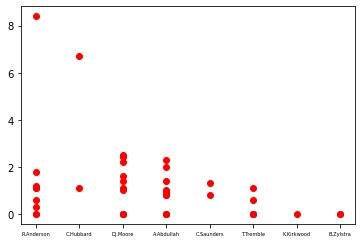

In [10]:
week1 = panthers[panthers['week'] == 18]
plt.plot(week1['receiver_player_name'], week1['half_receving_points'], 'ro')
plt.tick_params(axis='x', labelsize=5)

Lets look at each recievers catch every week and how many .5 ppr points they got.

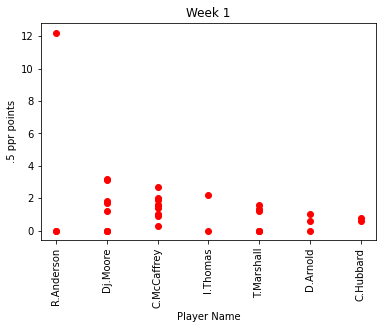

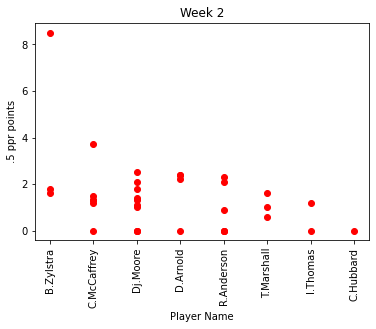

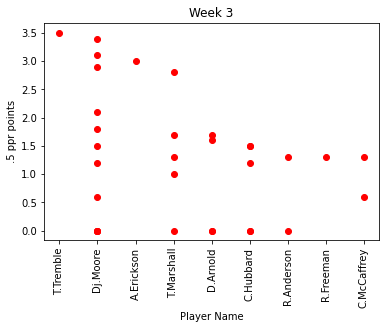

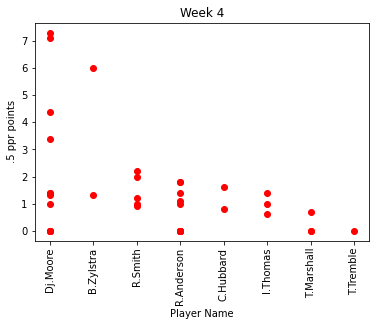

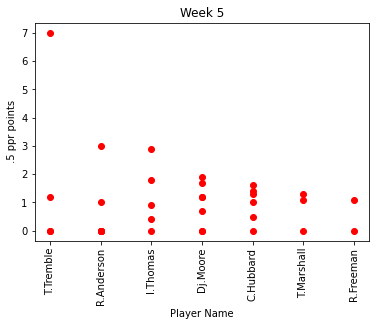

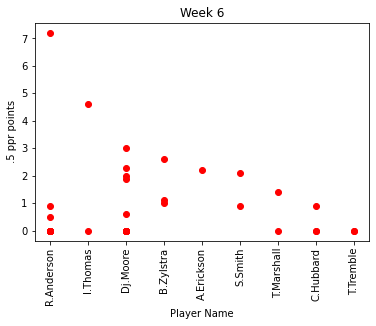

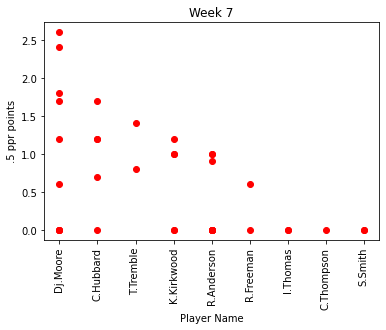

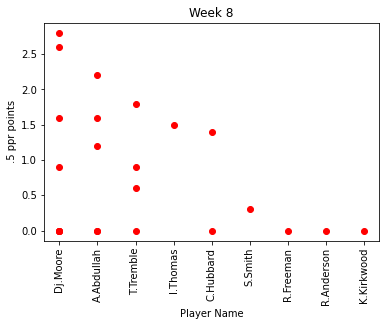

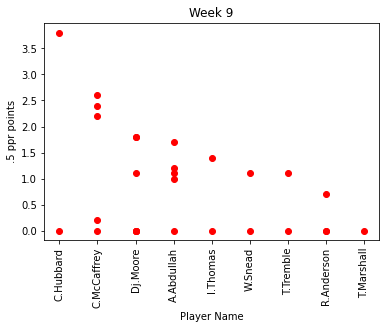

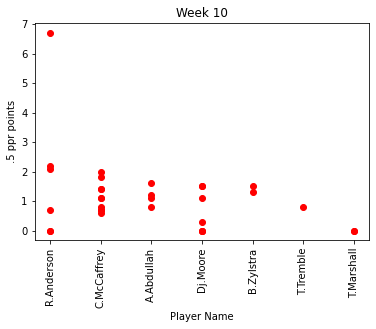

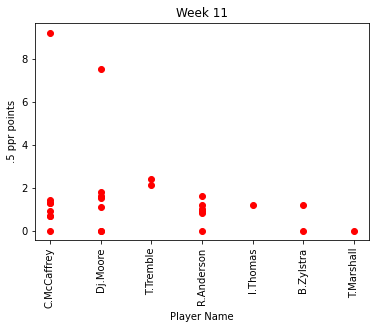

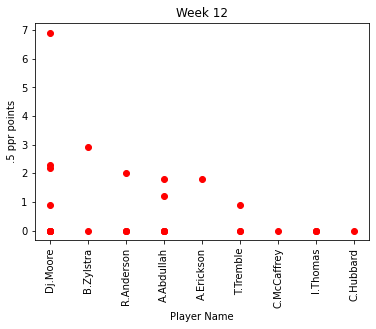

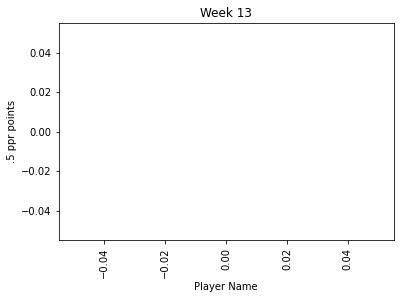

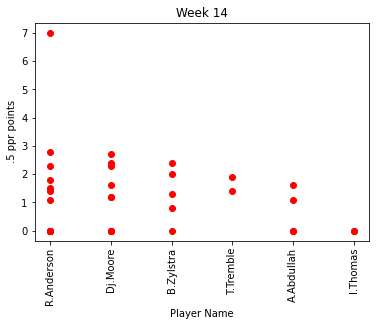

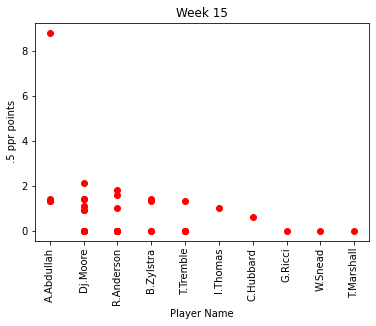

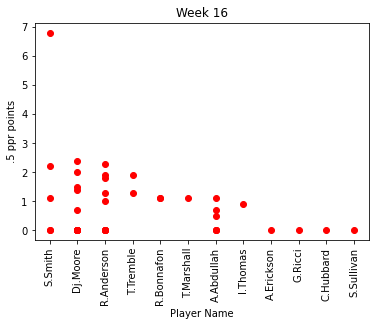

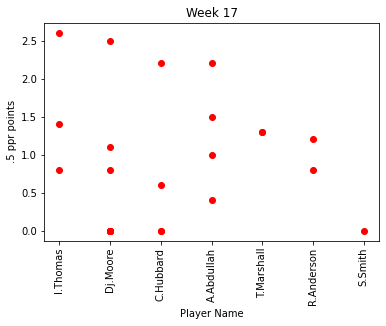

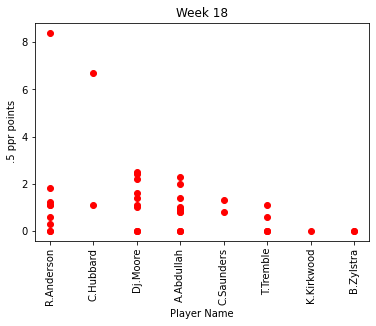

In [11]:
for i in range(1, 19):
    week = panthers[panthers['week'] == i]
    plt.plot(week['receiver_player_name'], week['half_receving_points'], 'ro',)
    plt.xticks(rotation=90)
    plt.title(f'Week {i}')
    plt.ylabel('.5 ppr points')
    plt.xlabel('Player Name')
    plt.show()

Lets look at the whole season now.

In [12]:
panthers_total = panthers[['receiver_player_name', 'half_receving_points']].groupby('receiver_player_name', as_index=False).sum().sort_values(by='half_receving_points')

Text(0.5, 0, 'Player Name')

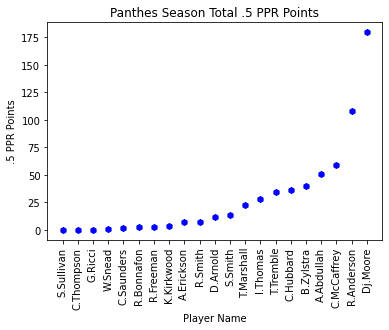

In [13]:
# full season plot
plt.plot(panthers_total['receiver_player_name'], panthers_total['half_receving_points'], 'bh')
plt.title('Panthes Season Total .5 PPR Points')
plt.xticks(rotation=90)
plt.ylabel('.5 PPR Points')
plt.xlabel('Player Name')

In [15]:
# Stats time
mean = np.mean(panthers_total['half_receving_points'])
print(mean)

28.98095238095238


Panthers average receiver had a total of 28.98 fantasy points in a .5 ppr league. Need to check for other teams.

In [17]:
teams = week1_pass_plays['posteam'].unique()

In [39]:
# add .5 points to passing df for week 1
passing_df['half_ppr'] = .5*passing_df['complete_pass'] + 6*passing_df['pass_touchdown'] + .1*passing_df['yards_gained']
week1_ppr = passing_df.loc[passing_df['week'] == 1].dropna()

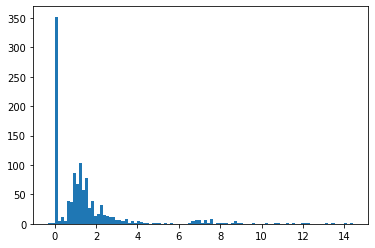

In [40]:
plt.hist(week1_ppr['half_ppr'], 100)
plt.show()

In [41]:
week1_completed = week1_ppr.loc[week1_ppr['complete_pass'] == 1]

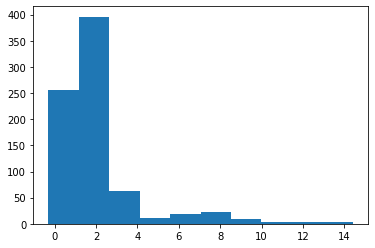

In [42]:
plt.hist(week1_completed['half_ppr'])
plt.show()

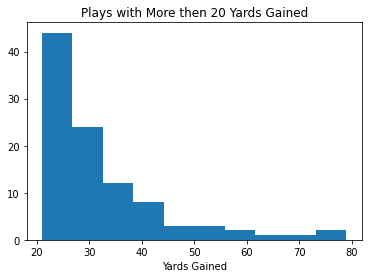

In [43]:
plt.hist(week1_completed.loc[week1_completed['yards_gained'] > 20]['yards_gained'])
plt.xlabel('Yards Gained')
plt.title('Plays with More then 20 Yards Gained')
plt.show()

In [69]:
# lets make a scatter plot
week1_total = week1_ppr[['receiver_player_name', 'half_ppr']].groupby('receiver_player_name', as_index=False).sum()

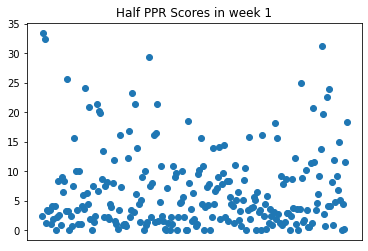

In [80]:
plt.scatter(week1_total['receiver_player_name'], week1_total['half_ppr'])
plt.xticks([])
plt.title('Half PPR Scores in week 1')
plt.show()


In [83]:
# linear regression
# Lets look at Cooper Kupp #1 reciever this year
# more specfically at his half ppr points over the season
kupp_df = passing_df.loc[passing_df['receiver_player_name'] == 'C.Kupp']
kupp_total = kupp_df[['week', 'half_ppr', ]].groupby('week', as_index=False).sum()

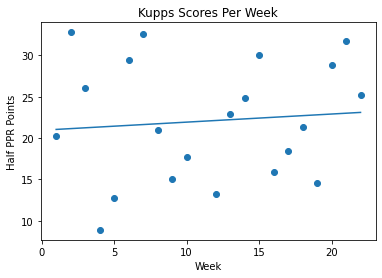

In [90]:
slope, intercept, r, p, std_err = stats.linregress(kupp_total['week'], kupp_total['half_ppr'])
def myfunc(x):
    # gives values for y axis
    return slope * x + intercept
mymodel = list(map(myfunc, kupp_total['week']))
plt.scatter(kupp_total['week'], kupp_total['half_ppr'])
plt.plot(kupp_total['week'], mymodel)
plt.title('Kupps Scores Per Week')
plt.xlabel('Week')
plt.ylabel('Half PPR Points')
plt.show()


In [91]:
print(r)

0.09051579461761916


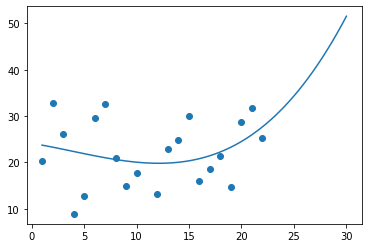

In [98]:
# not really related didnt expect it to be
mymodel2 = np.poly1d(np.polyfit(kupp_total['week'], kupp_total['half_ppr'], 3 ))
myline = np.linspace(1, 30, 100)
plt.scatter(kupp_total['week'], kupp_total['half_ppr'])
plt.plot(myline, mymodel2(myline))
plt.show()

# Lets look at avg distance of target
1. For 2021 season calculate avg distance of target for top 100 recievers
2. Make various plots etc

In [100]:
avg_distance = pbp_df.loc[pbp_df['pass_attempt'] == 1, ['week', 'receiver_player_id', 'posteam', 'receiver_player_name', 'yards_after_catch',
                                              'air_yards', 'complete_pass', 'yards_gained', 'pass_touchdown']]

In [105]:
for i in range(1, 19):
    # seperate weeks
    week = avg_distance[avg_distance['week'] == i]
